# Dow Jones Industrial Average (DJIA) Analysis
**Author:** Brett Vrtachnik  
**Date:** February 17, 2025  
**Source:** [Dow Jones](https://github.com/mwaskom/seaborn-data/blob/master/dowjones.csv)


## Project Overview
This project conducts an **Exploratory Data Analysis (EDA)** on the **Dow Jones Industrial Average (DJIA)** dataset from Seaborn. The dataset contains **historical monthly stock prices** from **1914 to 1968**, allowing us to explore stock market trends over time.

### **Objectives:**
- Understand the structure and distribution of the dataset.
- Visualize how **Dow Jones prices** evolved over time.
- Identify **long-term trends and fluctuations** using statistical summaries and visualizations.


## Import Dependencies

In [2]:
import pathlib
import requests
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Loading the Dataset
We begin by loading the **Dow Jones Industrial Average (DJIA)** dataset from Seaborn.  
This dataset provides monthly stock prices for the **Dow Jones Index** from 1914-1968.


In [3]:
df = sns.load_dataset('dowjones')

## Previewing the First 10 Entries
To gain an initial understanding of the dataset, we display the **first 10 rows**.

This allows us to:
- Verify the **structure of the dataset**.
- Examine how **dates and prices** are formatted.


In [4]:
print(df.head(10))

        Date  Price
0 1914-12-01  55.00
1 1915-01-01  56.55
2 1915-02-01  56.00
3 1915-03-01  58.30
4 1915-04-01  66.45
5 1915-05-01  65.95
6 1915-06-01  68.40
7 1915-07-01  71.85
8 1915-08-01  79.25
9 1915-09-01  85.50


## Understanding Data Structure
To better understand the dataset, we:
1. Check the **number of rows and columns** to determine dataset size.
2. Inspect **data types** to ensure:
   - "Date" is correctly formatted as a **datetime object**.
   - "Price" is stored as a **numeric value (float64)** for calculations.


In [5]:
print(df.shape)

print(df.dtypes)

(649, 2)
Date     datetime64[ns]
Price           float64
dtype: object


## Summary Statistics of Stock Prices
We generate summary statistics to analyze the distribution of Dow Jones prices.

Key insights include:
- **Mean Price:** The average Dow Jones price over time.
- **Minimum & Maximum Prices:** The lowest and highest stock prices recorded.
- **Standard Deviation:** A measure of price volatility.
- **Quartiles (25%, 50%, 75%):** Helps us understand how stock prices are distributed.

These statistics give us an overview of **market trends and fluctuations** over the dataset period.


In [6]:
print(df.describe())

                                Date       Price
count                            649  649.000000
mean   1941-11-30 17:42:48.258859776  290.807319
min              1914-12-01 00:00:00   46.850000
25%              1928-06-01 00:00:00  106.900000
50%              1941-12-01 00:00:00  172.270000
75%              1955-06-01 00:00:00  436.730000
max              1968-12-01 00:00:00  985.930000
std                              NaN  256.062906


## Viewing the Last 10 Entries
To analyze the most recent data in the dataset, we display the **last 10 rows**.

This helps us observe:
- The **final recorded stock prices** before the dataset ends.
- Whether prices continued to **increase or stabilize** in the later years.


In [7]:
print(df.tail(10))

          Date   Price
639 1968-03-01  834.76
640 1968-04-01  893.37
641 1968-05-01  905.22
642 1968-06-01  906.82
643 1968-07-01  905.32
644 1968-08-01  883.72
645 1968-09-01  922.80
646 1968-10-01  955.47
647 1968-11-01  964.12
648 1968-12-01  965.39


## Visualizing Dow Jones Price Trends
To explore how the **Dow Jones Industrial Average** evolved over time, we:
- Create a **scatter plot** to visualize individual stock prices.
- Overlay a **linear best-fit trendline** to highlight the overall growth pattern.
- Format the x-axis in **5-year intervals** to improve readability.

This visualization helps us observe both **short-term fluctuations** and **long-term trends** in the stock market.


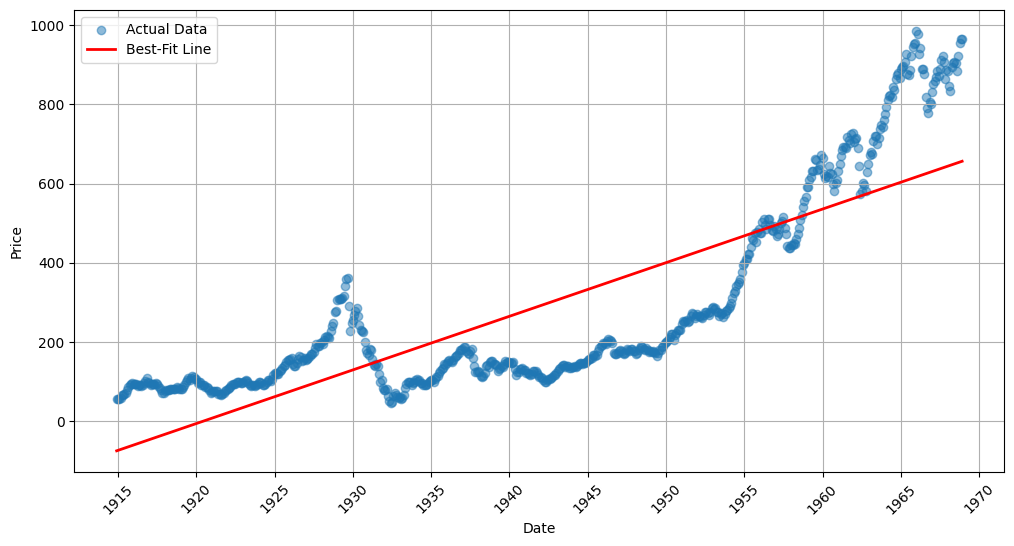

In [8]:
# Convert dates to numerical values for regression
df['Date_Num'] = df['Date'].astype('int64') // 10**9

# Fit a linear regression line
slope, intercept = np.polyfit(df['Date_Num'], df['Price'], 1)
trendline = slope * df['Date_Num'] + intercept

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot of actual data
plt.scatter(df['Date'], df['Price'], alpha=0.5, label="Actual Data")

# Plot the best-fit line (linear trend)
plt.plot(df['Date'], trendline, color='red', linewidth=2, label="Best-Fit Line")

# Formatting the x-axis for 5-year intervals
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Set major ticks every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as Year
plt.xticks(rotation=45)  # Rotate labels to prevent overlap

# Labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

## Observations from the Scatter Plot and Trendline

Looking at the visualization, we can see a few important trends:

- **Steady Growth Over Time:** The Dow Jones has generally increased over the years.
- **Ups and Downs in the Market:** There were some big drops, especially in the **1930s during the Great Depression**, showing times of economic struggle.
- **Faster Growth After 1950:** The trendline suggests that stock prices started rising more quickly after 1950, which could mean the economy was getting stronger.

Overall, this shows that even though the market had some **short-term ups and downs**, the long-term trend was upward.



## Analyzing Average Stock Prices by Decade  

Stock prices are grouped by **decades**, and the **average price** for each decade is calculated. This provides a clearer view of long-term trends.  


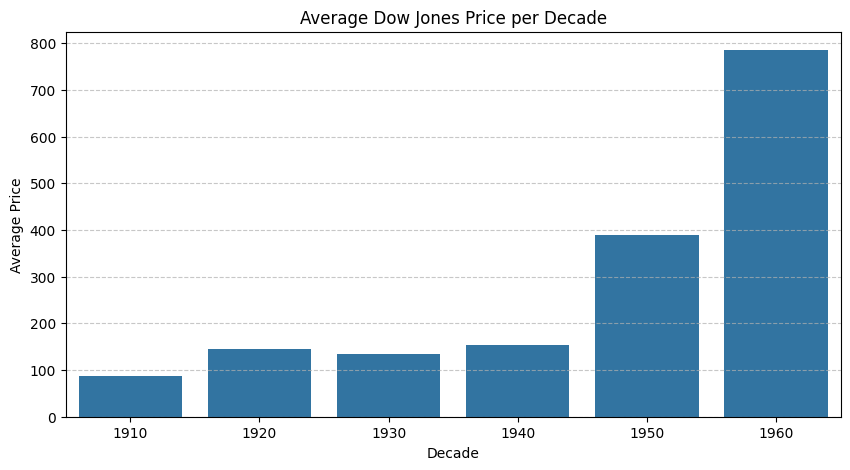

In [9]:
# Convert 'Date' column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the decade
df['Decade'] = (df['Date'].dt.year // 10) * 10

# Group by decade and calculate the average price
decade_avg_price = df.groupby('Decade')['Price'].mean()

# Plot the average price per decade
plt.figure(figsize=(10, 5))
sns.barplot(x=decade_avg_price.index, y=decade_avg_price.values)
plt.xlabel("Decade")
plt.ylabel("Average Price")
plt.title("Average Dow Jones Price per Decade")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



## Observations from the Average Price per Decade  

The chart shows that stock prices generally increased over time. Some decades had slower growth or declines, but the overall trend moved upward, especially after the 1950s.  
